## Logistic Regression Assumptions

#### 1)Binary logistic regression requires the dependent variable to be binary.
#### 2)For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
#### 3)Only the meaningful variables should be included.
#### 4)The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.
#### 6)The independent variables are linearly related to the log odds.
#### 7)Logistic regression requires quite large sample sizes.

## Data Overview Information
### The dataset comes from the UCI Machine Learning repository, and it is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. 
### The classification goal is to predict whether the client will subscribe (1/0) to a term deposit (variable y).

In [1]:
#importing Important Liabraries
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
plt.rc("font",size=14)
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)

In [2]:
#importing Data From Github raw Data
data=pd.read_csv('subcription_banking.csv')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [3]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

## Input variables Information
##### age (numeric)
##### job : type of job (categorical: “admin”, “blue-collar”, “entrepreneur”, “housemaid”, “management”, “retired”, “self-employed”, “services”, “student”, “technician”, “unemployed”, “unknown”)
##### marital : marital status (categorical: “divorced”, “married”, “single”, “unknown”)
##### education (categorical: “basic.4y”, “basic.6y”, “basic.9y”, “high.school”, “illiterate”, “professional.course”, “university.degree”, “unknown”)
##### default: has credit in default? (categorical: “no”, “yes”, “unknown”)
##### housing: has housing loan? (categorical: “no”, “yes”, “unknown”)
##### loan: has personal loan? (categorical: “no”, “yes”, “unknown”)
##### contact: contact communication type (categorical: “cellular”, “telephone”)
##### month: last contact month of year (categorical: “jan”, “feb”, “mar”, …, “nov”, “dec”)
##### day_of_week: last contact day of the week (categorical: “mon”, “tue”, “wed”, “thu”, “fri”)
##### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model
##### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
##### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
##### previous: number of contacts performed before this campaign and for this client (numeric)
##### poutcome: outcome of the previous marketing campaign (categorical: “failure”, “nonexistent”, “success”)
##### emp.var.rate: employment variation rate — (numeric)
##### cons.price.idx: consumer price index — (numeric)
##### cons.conf.idx: consumer confidence index — (numeric)
##### euribor3m: euribor 3 month rate — (numeric)
##### nr.employed: number of employees — (numeric)

## Predict variable (desired target):
##### y — has the client subscribed a term deposit? (binary: “1”, means “Yes”, “0” means “No”)

In [4]:
data.education.unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [5]:
#Cleaning education column
data['education']=np.where(data['education']=='basic.4y','Basic',data['education'])
data['education']=np.where(data['education']=='basic.9y','Basic',data['education'])
data['education']=np.where(data['education']=='basic.6y','Basic',data['education'])
data.education.unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

In [6]:
#checking for NaN Values
data.columns.isna()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

## Data Exploration

In [7]:
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

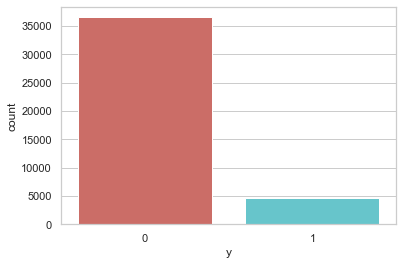

In [8]:
sns.countplot(x='y',data=data,palette='hls')
plt.show()

In [12]:
#counting percentage of data
count_no_sub=len(data[data['y']==0])
count_sub=len(data[data['y']==1])
pct_of_no_sub=count_no_sub/(count_no_sub+count_sub)
pct_of_sub=count_sub/(count_no_sub+count_sub)
print('Count OF No Subscribe      : ',count_no_sub)
print('Count OF Subscribe         : ',count_sub)
print('Percentage OF No Subscribe : ',pct_of_no_sub*100)
print('Percentage OF Subscribe    : ',pct_of_sub*100)

Count OF No Subscribe      :  36548
Count OF Subscribe         :  4640
Percentage OF No Subscribe :  88.73458288821988
Percentage OF Subscribe    :  11.265417111780131


## Percentage of no subscription is :  88.73458288821988
## Percentage of subscription is       :  11.265417111780131
#### Our classes are imbalanced, and the ratio of no-subscription to subscription instances is 89:11. Before we go ahead to balance the classes, let’s do some more exploration.

In [13]:
#some more exploration
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


### Observations:
##### 1) The average age of customers who bought the term deposit is higher than that of the customers who didn’t.
##### 2) The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. The lower the pdays, the better the memory of the last call and hence the better chances of a sale.
##### 3)Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.
##### 4)We can calculate categorical means for other categorical variables such as education and marital status to get a more detailed sense of our data.


In [11]:
data.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [12]:
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
Basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113,0.087029
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


In [13]:
data.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


## Visualization

Text(0, 0.5, 'Subcription Frequency')

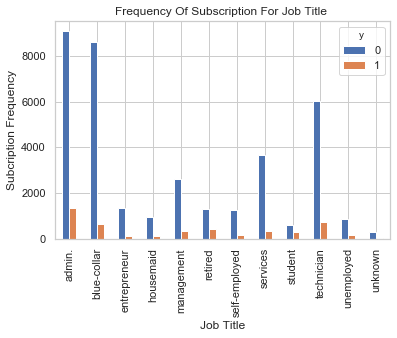

In [14]:
%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Frequency Of Subscription For Job Title ')
plt.xlabel('Job Title')
plt.ylabel('Subcription Frequency')

#### The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

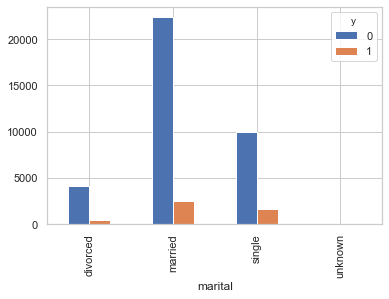

In [15]:
pd.crosstab(data.marital,data.y).plot(kind='bar')

#### The marital status does not seem a strong predictor for the outcome variable.

Text(0, 0.5, 'Proportion of Customers')

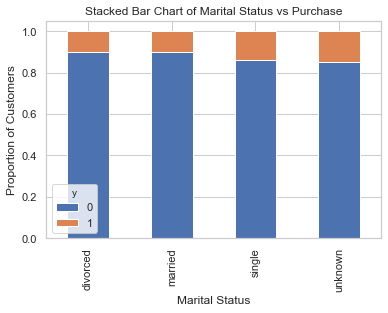

In [16]:
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')

#### The marital status does not seem a strong predictor for the outcome variable.

y,0,1
education,,
Basic,11424,1089
high.school,8484,1031
illiterate,14,4
professional.course,4648,595
university.degree,10498,1670
unknown,1480,251


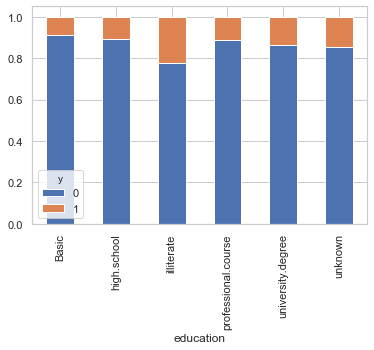

In [18]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
table

### Education seems a good predictor of the outcome variable.

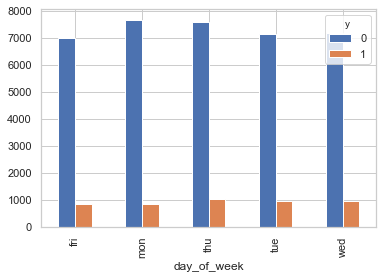

In [19]:
pd.crosstab(data.day_of_week,data.y).plot(kind='bar')

### Day of week may not be a good predictor of the outcome.


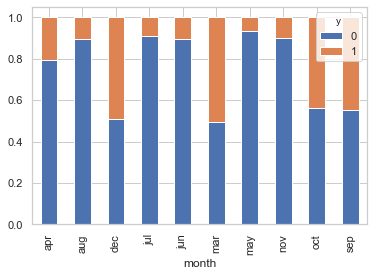

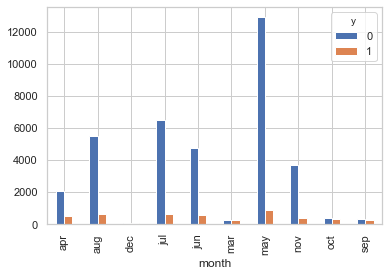

In [20]:
table=pd.crosstab(data.month,data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
pd.crosstab(data.month,data.y).plot(kind='bar')

### Month might be a good predictor of the outcome variable.

Text(0, 0.5, 'Frequency')

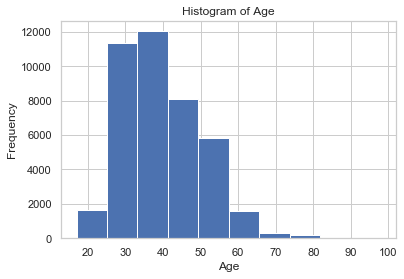

In [21]:
plt.hist(data.age)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

### Most of the customers of the bank in this dataset are in the age range of 30–40.


In [22]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [24]:
#creating dummy variables for categorical colums
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list=pd.get_dummies(data[var],prefix=var)
    data1=data.join(cat_list)
    data=data1
data

ValueError: columns overlap but no suffix specified: Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown'],
      dtype='object')

In [25]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
##removing categorical wich are not Hot Encoded  or remove categorical old colund
data_vars=data.columns.values.tolist()
data_vars
to_keep=[i for i in data_vars if i not in cat_vars]
to_keep

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed',
 'y',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_Basic',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_no',
 'default_unknown',
 'default_yes',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_

In [26]:
#final data to keep
data_final=data[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

### Over-sampling using SMOTE
#### With our training data created, I’ll up-sample the no-subscription using the SMOTE algorithm(Synthetic Minority Oversampling Technique). At a high level, SMOTE:
##### 1) Works by creating synthetic samples from the minor class (no-subscription) instead of creating copies.
##### 2) Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.
##### 3) Always split your data in training and testing before Over Sampling.

In [27]:
#splitting X and Y
X=data_final.loc[:, data_final.columns != 'y']
y=data_final.loc[:, data_final.columns == 'y']

In [28]:
##installed imbalanced dataset liabry
#!pip install imblearn --user requests

In [29]:
#impoting Oversampling Liabrary For SMOTE
from imblearn.over_sampling import SMOTE

In [30]:
#SMOTE stored in os
os=SMOTE(random_state=0)
#splittin data into training and testing
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=.3,random_state=0)
columns=X_train.columns
#applying SMOTE Using os i.e variable of SMOTE
os_data_X,os_data_y=os.fit_sample(X_train,y_train)
#applying column name of data
os_data_X=pd.DataFrame(data=os_data_X,columns=columns)
os_data_y=pd.DataFrame(data=os_data_y,columns=['y'])

In [31]:
# we can Check the numbers of our data
print('Lenght Of Over Sample Data               :  ',len(os_data_X))
print('Num Of No Subcription in Data            :  ',len(os_data_y[os_data_y['y']==0]))
print('Num Of Subcription in Data               :  ',len(os_data_y[os_data_y['y']==1]))
print('Num Of No Subcription in Data            :  ',len(os_data_y[os_data_y['y']==0]))
print('Num Proportion Of No Subcription in Data :  ',len(os_data_y[os_data_y['y']==0])/len(os_data_y))
print('Num Proportion Of Subcription in Data    :  ',len(os_data_y[os_data_y['y']==1])/len(os_data_y))


Lenght Of Over Sample Data               :   51134
Num Of No Subcription in Data            :   25567
Num Of Subcription in Data               :   25567
Num Of No Subcription in Data            :   25567
Num Proportion Of No Subcription in Data :   0.5
Num Proportion Of Subcription in Data    :   0.5


Now we have a perfect balanced data! You may have noticed that I over-sampled only on the training data, because by oversampling only on the training data, none of the information in the test data is being used to create synthetic observations, therefore, no information will bleed from test data into the model training.


### Recursive Feature Elimination
Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [33]:
#creating columns list
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
#Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
#logistic regression variable
log_regn=LogisticRegression()
#RFE variable with iteration
rfe=RFE(log_regn,20)
rfe=rfe.fit(os_data_X,os_data_y.values.ravel())
rfe

C:\Users\sohel\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\sohel\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\sohel\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

C:\Users\sohel\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\sohel\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

C:\Users\sohel\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\sohel\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [35]:
#finding important column or feature which is shown "True or 1 "
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False False
 False False False False False False False False False False  True  True
  True  True  True  True False  True  True  True False False False  True
  True  True  True  True  True False False False False False False False
 False False False False False  True  True  True  True  True False False
 False]
[37 38 32 39 30 33 29 36 21 34 15  8  9 10 14 19 13 12 18 11 17 16  1  1
  1  1  1  1 40  1  1  1  3  2 42  1  1  1  1  1  1  5  4 22 24 25 27 26
 35 20 23 41 28  1  1  1  1  1  7  6 31]


### The RFE has helped us select the following features:
[ “euribor3m”, “job_blue-collar”, “job_housemaid”, “marital_unknown”, “education_illiterate”, “default_no”, “default_unknown”, “contact_cellular”, “contact_telephone”, “month_apr”, “month_aug”, “month_dec”, “month_jul”, “month_jun”, “month_mar”, “month_may”, “month_nov”, “month_oct”, “poutcome_failure”, “poutcome_success”]

In [36]:
cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 'default_no', 'default_unknown', 
      'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
      'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"] 
X=os_data_X[cols]
y=os_data_y['y']

### Implementing the model

In [37]:
import statsmodels.api as sm
model=sm.Logit(y,X).fit()
model.summary2()

Optimization terminated successfully.
         Current function value: 0.455646
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Pseudo R-squared:  0.343     
Dependent Variable:   y                 AIC:               46637.9802
Date:                 2020-08-11 13:14  BIC:               46814.8243
No. Observations:     51134             Log-Likelihood:    -23299.   
Df Model:             19                LL-Null:           -35443.   
Df Residuals:         51114             LLR p-value:       0.0000    
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
euribor3m             0.1613   0.0082  19.7907 0.0000  0.1454  0.1773
job_blue-collar      -0.9962   0.0381 -26.1210 0.0000 -1.0710 -0.9215
job_housemaid        -1.6291   0.1377 -11.8313 0.0000 -1.8990 -1.3593
marital_unknown      -1.1079   0.4206  -2.6344 0.0084 -1.9322 -0.2836
education_illiterate  0.2405   0.6653   0.3615 0.7177 -1.0635  1.5446
default_no            0.7975   0.0371  21.5120 0.0000  0.7249  0.8702
default_unknown      -0.4643   0.0569  -8.1548 0.0000 -0.5759 -0.3527
contact_cellular      1.5100   0.0442  34.1992 0.0000  1.4235  1.5965
contact_telephone    -0.3732   0.0574  -6.4992 0.0000 -0.4857 -0.2606
month_apr            -2.1774   0.0546 -39.8633 0.0000 -2.2844 -2.0703
month_aug            -3.6208   0.0529 -68.4450 0.0000 -3.7245 -3.5171
month_dec            -1.7427   0.1714 -10.1666 0.0000 -2.0786 -1.4067
month_jul            -3.4498   0.0530 -65.1501 0.0000 -3.5536 -3.3460
month_jun            -2.0958   0.0529 -39.5837 0.0000 -2.1996 -1.9921
month_mar            -1.0946   0.0955 -11.4636 0.0000 -1.2817 -0.9074
month_may            -2.5259   0.0441 -57.2330 0.0000 -2.6124 -2.4394
month_nov            -3.6153   0.0577 -62.6943 0.0000 -3.7284 -3.5023
month_oct            -1.0515   0.0856 -12.2870 0.0000 -1.2192 -0.8837
poutcome_failure     -0.8994   0.0462 -19.4634 0.0000 -0.9899 -0.8088
poutcome_success      2.4588   0.0662  37.1305 0.0000  2.3290  2.5885
=====================================================================

"""

In [39]:
cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'default_no', 'default_unknown', 
      'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
      'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"] 
X=os_data_X[cols]
y=os_data_y['y']
model=sm.Logit(y,X).fit()
print(model.summary2())


Optimization terminated successfully.
         Current function value: 0.455647
         Iterations 7
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.343     
Dependent Variable:  y                AIC:              46636.1080
Date:                2020-08-11 13:16 BIC:              46804.1099
No. Observations:    51134            Log-Likelihood:   -23299.   
Df Model:            18               LL-Null:          -35443.   
Df Residuals:        51115            LLR p-value:      0.0000    
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      7.0000                                       
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
euribor3m          0.1613   0.0082  19.7888 0.0000  0.1453  0.1773
job_blue-collar   -0.9961   0.0381 -26.1188 0.0000 -1

In [41]:
#training model for final data and features
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

C:\Users\sohel\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [43]:
#checking accurasy
y_pred = log_reg.predict(X_test)
print('Accuracy of logistic regression classifier on test set:', log_reg.score(X_test, y_test))

Accuracy of logistic regression classifier on test set: 0.8709340981683071


In [44]:
# confuasion metrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[7021,  645],
       [1335, 6340]], dtype=int64)

### The result is telling us that we have  6124 + 5170  correct predictions and 2505+1542 incorrect predictions.

In [47]:
#classificatin report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.92      0.88      7666
           1       0.91      0.83      0.86      7675

    accuracy                           0.87     15341
   macro avg       0.87      0.87      0.87     15341
weighted avg       0.87      0.87      0.87     15341



## ROC Curve


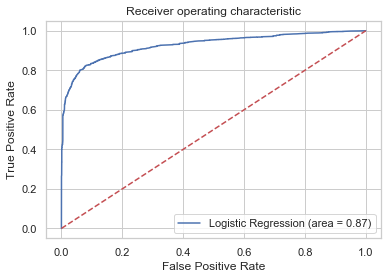

In [71]:
#impoerting ROC AUC Libriries
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
#pridicting ROC AUC Curve
logit_roc_auc_area = roc_auc_score(y_test, log_reg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_area)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [3]:
!pip install jupyterthemes

In [ ]:
!jt -t chesterish